<a href="https://colab.research.google.com/github/ersmythe/MAT421/blob/main/Module_H1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 22.1 ODE Initial Value Problem Statement
A differential equation includes a function, its independent variable, and some of the function's derivatives. A differential equation is ordinary (ODE) if there is only one dimension of the independent variable.

A partial differential equation (PDE) is similar, but it has multiple independent variables (like a function of x and y).

General solution (g(x)): a function that solves the differential equation.

Particular solution (p(x)): a function that solves the differential equation and takes into account known values. Often considered the "solution".

Often, the known values of a solution are initial values. These are the values of the solution and its derivatives at 0: x = 0, f(0), f'(0), ...


# 22.2 Reduction of Order
Many strategies to solve initial value problems are set up for only first-order differential equations (especially when solving using software). That said, the same strategies can be used for higher order as long as we put it into a system of first-order differential equations. Consider the vector S(t), which is a system's state as a function of time. There are many options, but for initial value problems a useful state is
$S(t) = \begin{bmatrix} f(t) \\ f^{(1)}(t) \\ f^{(2)}(t) \\ \vdots \\ f^{(n-1)}(t) \end{bmatrix}$

The derivative of the state is

$\frac {dS(t)} {dt}  = \begin{bmatrix} S_2(t) \\ S_3(t) \\ S_4(t) \\ \vdots \\ F(t, S_1(t), S_2(t), ..., S_{n-1}(t)) \end{bmatrix}$


Example:


$\frac {dr(t)} {dt} = 4r(t) - 2w(t)$

$\frac {dw(t)} {dt} = r(t) + w(t)$

$S(t) = \begin{bmatrix} r(t) \\ w(t) \end{bmatrix}  $

$\frac {dS(t)} {dt} = \begin{bmatrix} 4 & -2 \\ 1 & 1 \end{bmatrix}S(t)  $


# 22.3 The Euler Method
Explicit Euler Formula:

$\frac {dS(t)} {dt} = F(t, S(t))$ is a first order ODE. Consider this across a numerical grid along the interval $[t_0, t_f]$ with spacing of h. We can assume that $t_0 = 0$ and $t_f=Nh$ for some positive integer N. The linear approximation of S(t) around $t_j$ at $t_{j+1}$ is $S(t_{j+1}) = S(t_j) + (t_{j+1}-t_j) \frac {dS(t_j)} {dt}$, which can be rewritten as $S(t_{j+1}) = S(t_j) + hF(t_j, S(t_j))$

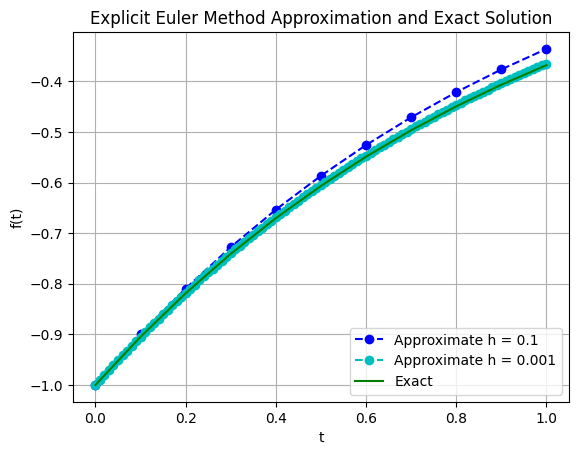

In [6]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda t, s: np.exp(-t)
h1 = 0.1
h2 = 0.01
t1 = np.arange(0, 1 + h1, h1)
t2 = np.arange(0, 1 + h2, h2)
s0 = -1

s1 = np.zeros(len(t1))
s2 = np.zeros(len(t2))
s1[0] = s0
s2[0] = s0

for j in range(0, len(t1) - 1):
  s1[j+1] = s1[j] + h1*f(t1[j], s1[j])

for i in range(0, len(t2) - 1):
  s2[i+1] = s2[i] + h2*f(t2[i], s2[i])

plt.plot(t1, s1, 'bo--', label='Approximate h = 0.1')
plt.plot(t2, s2, 'co--', label = 'Approximate h = 0.001')
plt.plot(t1, -np.exp(-t1), 'g', label = 'Exact')
plt.title('Explicit Euler Method Approximation and Exact Solution')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

There is also an Implicit Euler Formula, which requires we know $S(t_{j+1})$ to calculate it:

$S(t_{j+1}) = S(t_j) + hF(t_{j+1}, S(t_{j+1}))$

There is also the Trapezoidal Formula, which is an average of the Explicit and Implicit Euler Formulas:

$S(t_{j+1}) = S(t_j) + \frac {h}{2}(F(t_j, S(t_j)) + (t_{j+1}, S(t_{j+1})))$